# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ab = pd.read_csv('AB_NYC_2019.csv')
df_ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df_ab.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
# How many neighborhood groups are available and which shows up the most?
df_ng = df_ab.groupby('neighbourhood_group')['neighbourhood_group'].count()
df_ng

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
nc = len(df_ng)
nc

5

In [6]:
print(f"There are {nc} neighborhood groups available and Manhattan shows up the most (21661 times).")

There are 5 neighborhood groups available and Manhattan shows up the most (21661 times).


In [7]:
# Are private rooms the most popular in manhattan
man = df_ab.query('neighbourhood_group == "Manhattan"')
rt = man.groupby('room_type')['room_type'].count()
rt


room_type
Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64

In [8]:
rt=pd.DataFrame(rt)
rtl = list(rt.index)
rtl

['Entire home/apt', 'Private room', 'Shared room']

Private rooms are the 2nd most popular listing with Air BnB, with 7982 listings.


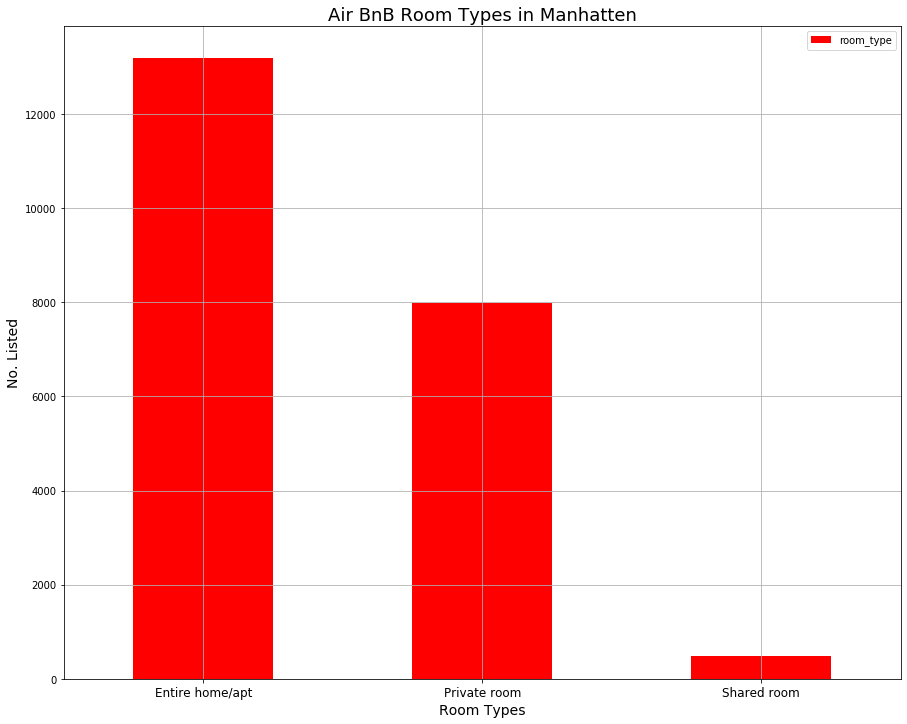

In [9]:
print(f"Private rooms are the 2nd most popular listing with Air BnB, with 7982 listings.")
rt.plot(kind="bar", figsize=(15,12), grid=True, color=['r', 'b', 'g'])
plt.title("Air BnB Room Types in Manhatten", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Room Types", fontsize=14)
plt.ylabel("No. Listed", fontsize=14);

In [10]:
# Which hosts are the busiest and based on their reviews?
df_rv = df_ab.groupby('host_name')['number_of_reviews'].count()
df_rv = pd.DataFrame(df_rv)
rv3 = df_rv.query('number_of_reviews > 10')
rv10 = rv3.sort_values('number_of_reviews', ascending=False).nlargest(10, 'number_of_reviews')
rv10


# df_rv = pd.DataFrame(df_rv)
# df_rv.groupby('number_of_reviews')


,number_of_reviews
host_name,
Michael,417
David,403
Sonder (NYC),327
John,294
Alex,279
Blueground,232
Sarah,227
Daniel,226
Jessica,205


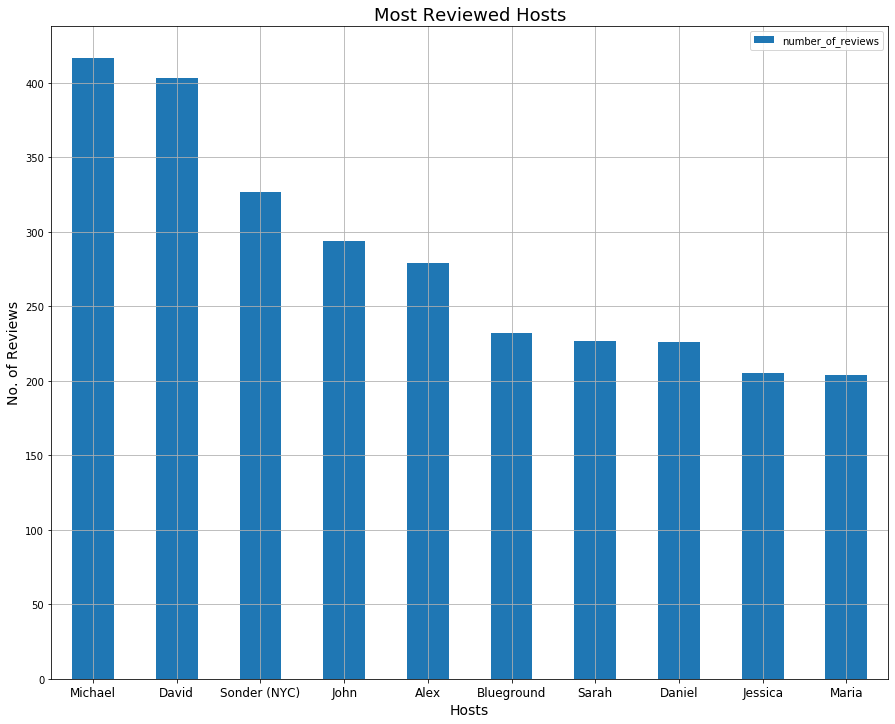

In [11]:
print('The following hosts are busiest based on their reviews:')
rv10.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Most Reviewed Hosts", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Hosts", fontsize=14)
plt.ylabel("No. of Reviews", fontsize=14);

In [12]:
#Which neighorhood group has the highest average price?
from statistics import mean
df_avgp = df_ab.groupby('neighbourhood_group')['price'].mean()
df_avgp

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

The neighborhood group with the highest average price was Manhattan at $196.88


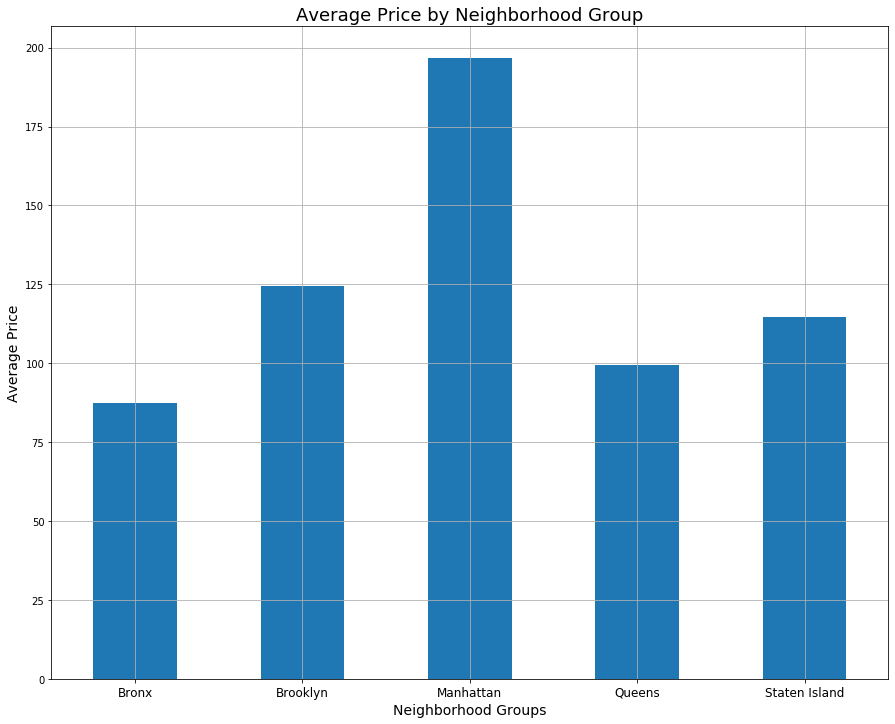

In [13]:
print(f"The neighborhood group with the highest average price was Manhattan at $196.88")
df_avgp.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Average Price by Neighborhood Group", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Neighborhood Groups", fontsize=14)
plt.ylabel("Average Price", fontsize=14);

In [14]:
# Which neighbor hood group has the highest total price?
df_sump = df_ab.groupby('neighbourhood_group')['price'].sum()
df_sump

neighbourhood_group
Bronx              95459
Brooklyn         2500600
Manhattan        4264527
Queens            563867
Staten Island      42825
Name: price, dtype: int64

The neighborhood group with the highest total price was Manhattan at $4,264,527


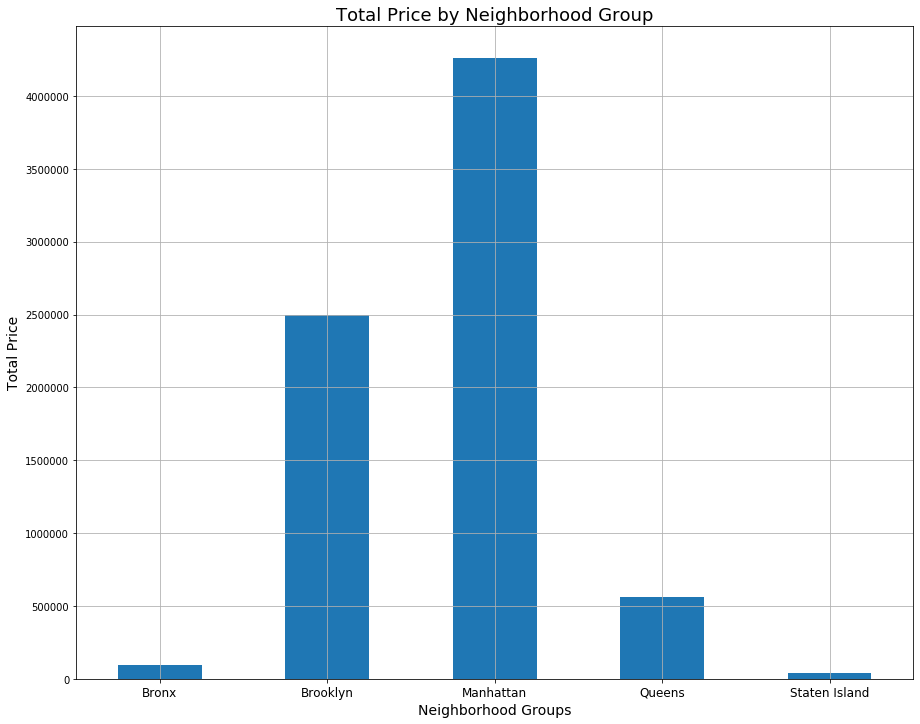

In [146]:
print(f"The neighborhood group with the highest total price was Manhattan at $4,264,527")
df_sump.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Total Price by Neighborhood Group", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Neighborhood Groups", fontsize=14)
plt.ylabel("Total Price", fontsize=14);

In [141]:
#Which top 5 hosts have the highest total price?
df_hosttp = df_ab.groupby('host_name')['price'].sum().nlargest(5)
df_hosttp

host_name
Sonder (NYC)    82795
Blueground      70331
Michael         66895
David           65844
Alex            52563
Name: price, dtype: int64

The following hosts had the top 5 highest total prices:


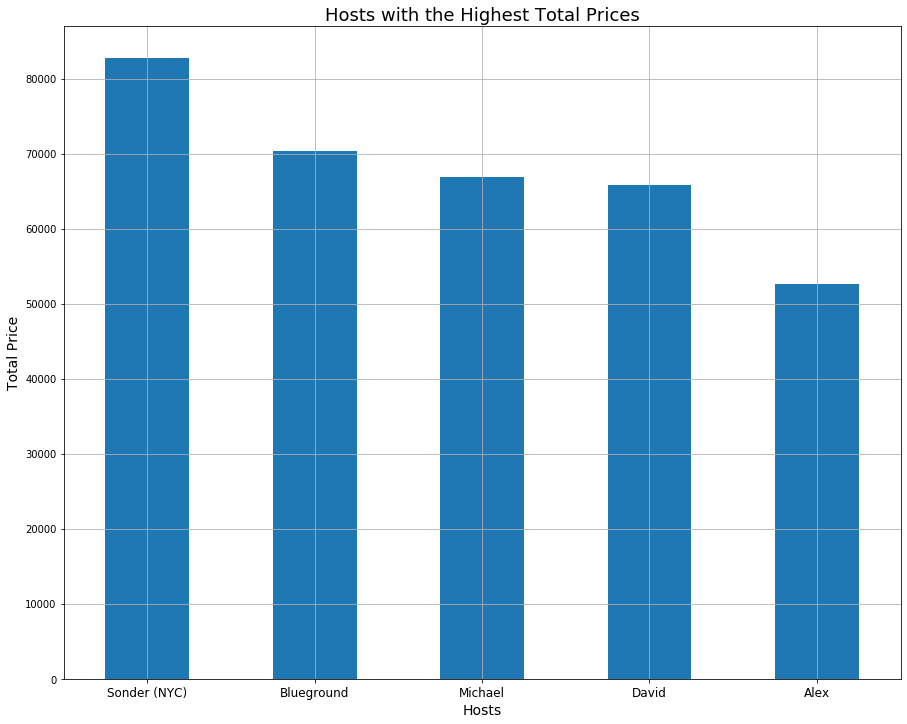

In [143]:
print(f"The following hosts had the top 5 highest total prices:")
df_hosttp.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Hosts with the Highest Total Prices", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Hosts", fontsize=14)
plt.ylabel("Total Price", fontsize=14);

In [46]:
# Who currently has no (zero) availability with a review count of 100 or more?
noz = df_ab.query('availability_365 == 0')
nlist = list(noz['host_name'])


df_rv2 = df_ab.groupby('host_name')['number_of_reviews'].count()
df_rv2 = pd.DataFrame(df_rv2)
newrv = df_rv2.query('number_of_reviews >= 100')
newrv = newrv.reset_index()
hunlist = list(newrv['host_name'])


hunbutzero = []
ylist = []
for n in range(len(hunlist)):
    if hunlist[n] in nlist:
        hunbutzero.append(hunlist[n])
    else:
        ylist.append(hunlist[n])

print(f"These hosts have over 100 reviews and no zero availability: {ylist}")
        
# print(f"These hosts have over 100 reviews but also have a zero availability listing: {hunbutzero}")
        


These hosts have over 100 reviews and no zero availability: ['Blueground', 'Sonder (NYC)']


In [60]:
# What host has the highest total of prices and where are they located?
hpmax = df_ab.groupby('host_name')['price'].sum().max()
hpmax

82795

In [79]:
df_hp = df_ab.groupby('host_name')['price'].sum()
df_hp = pd.DataFrame(df_hp)
topp = df_hp.query('price == 82795')
topp 

# = topp.reset_index()
# host = topp.host_name
# price = topp.price
# print(f"Host: {host}, Total: {price}")

,price
host_name,
Sonder (NYC),82795


In [86]:
tophst = df_ab.query('host_name == "Sonder (NYC)"')
group = list(tophst['neighbourhood_group'].unique())
print(group)
neigh = list(tophst['neighbourhood'].unique())
print(neigh)

['Manhattan']
['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown', 'Theater District', 'Chelsea', 'Upper East Side']


In [88]:
print(f"The host with the highest total prices is Sonder (NYC) with a total of $82,795. Sonder (NYC) is located in {group} in the following neighborhoods: {neigh}.")

The host with the highest total prices is Sonder (NYC) with a total of $82,795. Sonder (NYC) is located in ['Manhattan'] in the following neighborhoods: ['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown', 'Theater District', 'Chelsea', 'Upper East Side'].


In [118]:
# When did Danielle from Queens last receive a review?
danq = df_ab.query('host_name == "Danielle" & neighbourhood_group == "Queens"')
danq['last_review'] = pd.to_datetime(danq.last_review)
danq.sort_values(by='last_review')
lastr = danq.last_review.max()

C:\Users\jrthu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
print(f"Danielle from Queens reviewed her last review on {lastr}.")

Danielle from Queens reviewed her last review on 2019-07-08 00:00:00.


## Further Questions

1. Which host has the most listings?

In [128]:
mhostnum = df_ab.groupby('host_name').count().max().nlargest(1)
mhostnum

id    417
dtype: int64

In [130]:
mhostlist = df_ab.groupby('host_name').count()
mhostlist.query('id == 417')

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_name,,,,,,,,,,,,,,,
Michael,417,417,417,417,417,417,417,417,417,417,417,335,335,417,417


In [131]:
print(f"Michael has 417 listings, the most of any host.")

Michael has 417 listings, the most of any host.


2. How many listings have completely open availability?

In [134]:
avail = df_ab.query('availability_365 == 365')
availnum = len(avail)
print(f"{availnum} listings are completely open (365 days per year).")

1295 listings are completely open (365 days per year).


3. What room_types have the highest review numbers?

Entire home/apt listings have the highest number of reviews (25409 reviews).


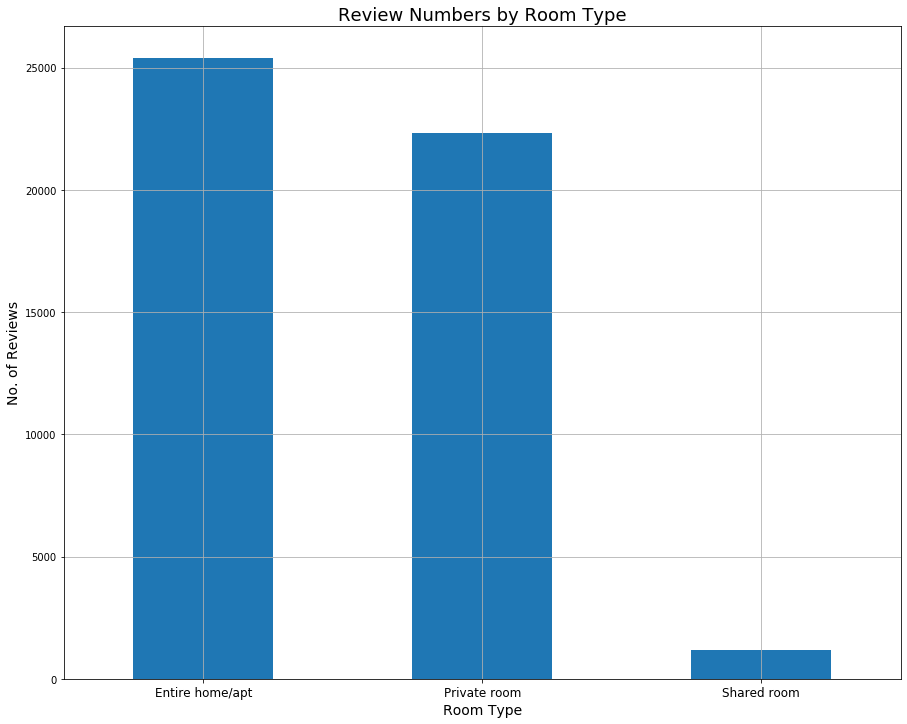

In [136]:
rtrev = df_ab.groupby('room_type')['number_of_reviews'].count()
print(f"Entire home/apt listings have the highest number of reviews (25409 reviews).")
rtrev.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Review Numbers by Room Type", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("No. of Reviews", fontsize=14);

# Final Conclusion

AirBnB NY Locations Data Case Study - Final Conclusions


There are 5 neighborhood groups available and Manhattan shows up the most (21661 times).

Private rooms are the 2nd most popular listing with Air BnB, with 7982 listings.


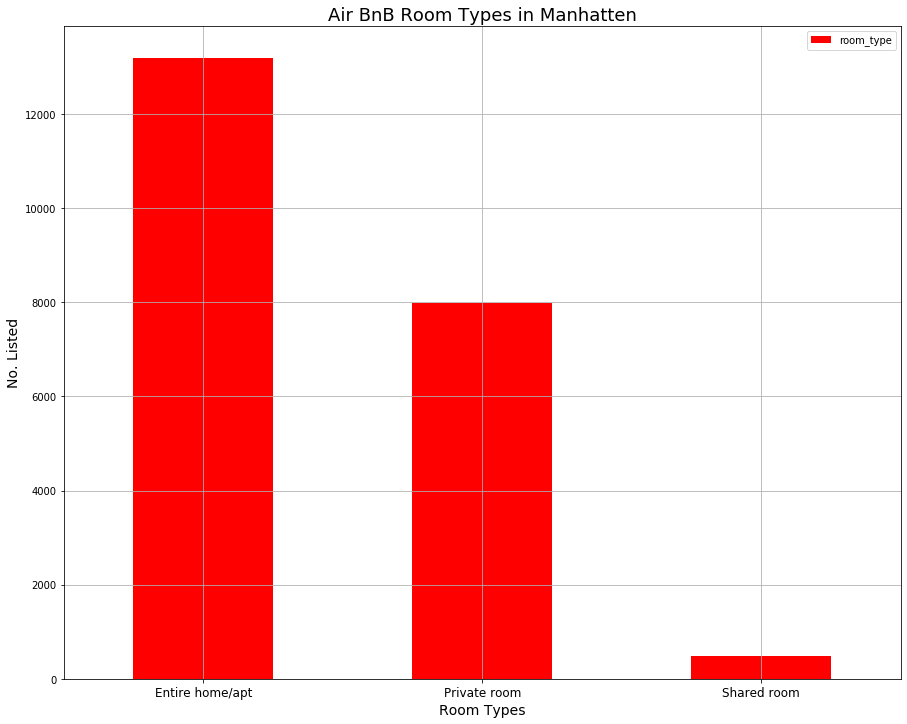

In [147]:
print('AirBnB NY Locations Data Case Study - Final Conclusions\n\n')

print(f"There are {nc} neighborhood groups available and Manhattan shows up the most (21661 times).\n")

print(f"Private rooms are the 2nd most popular listing with Air BnB, with 7982 listings.")
rt.plot(kind="bar", figsize=(15,12), grid=True, color=['r', 'b', 'g'])
plt.title("Air BnB Room Types in Manhatten", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Room Types", fontsize=14)
plt.ylabel("No. Listed", fontsize=14);


    


The following hosts are busiest based on their reviews:


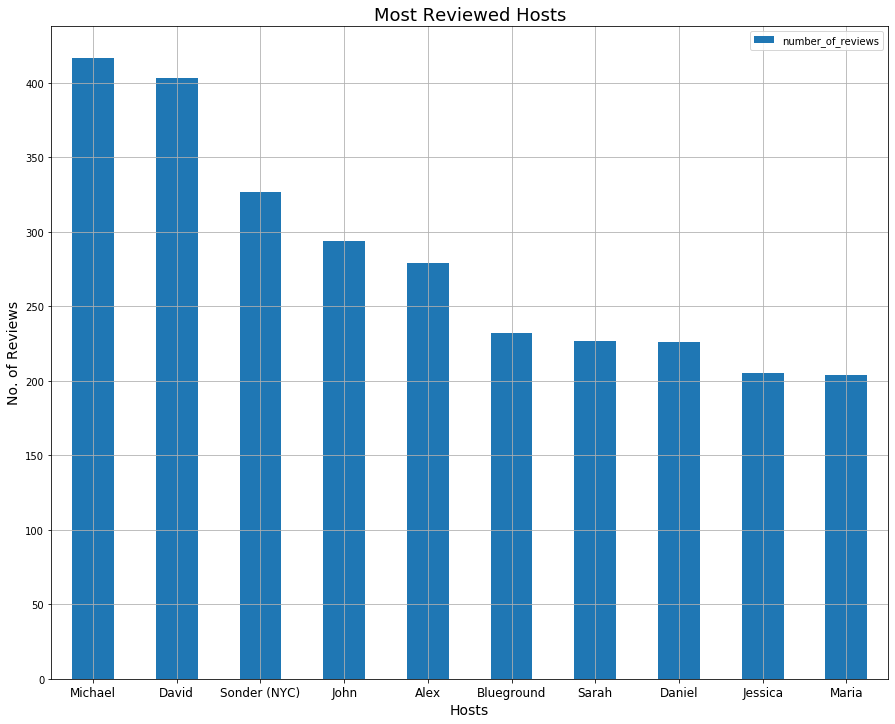

In [148]:
print('The following hosts are busiest based on their reviews:')

rv10.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Most Reviewed Hosts", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Hosts", fontsize=14)
plt.ylabel("No. of Reviews", fontsize=14);



The neighborhood group with the highest average price was Manhattan at $196.88


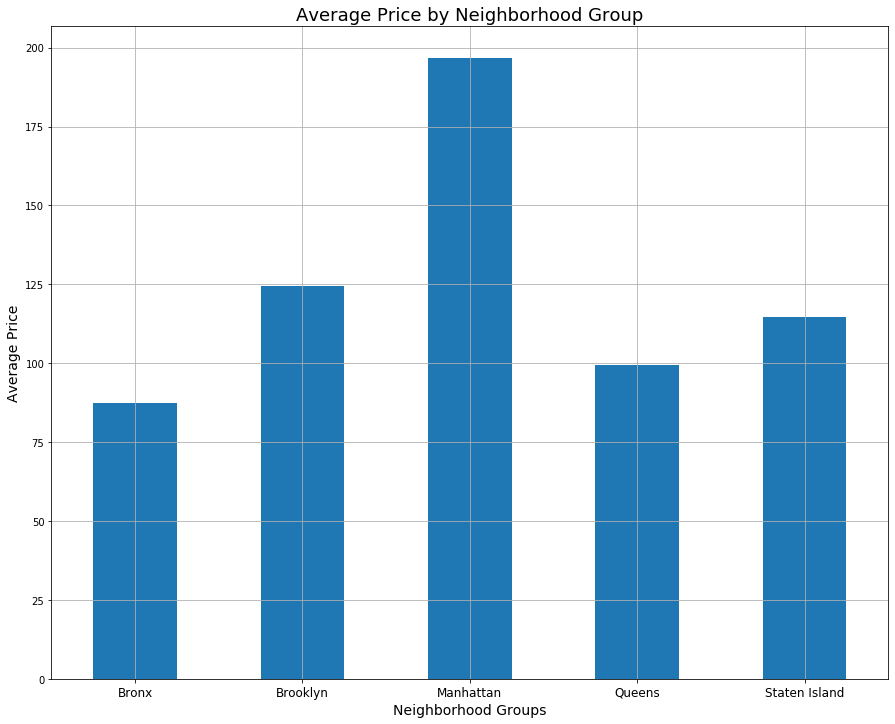

In [149]:
print(f"The neighborhood group with the highest average price was Manhattan at $196.88")

df_avgp.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Average Price by Neighborhood Group", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Neighborhood Groups", fontsize=14)
plt.ylabel("Average Price", fontsize=14);



The neighborhood group with the highest total price was Manhattan at $4,264,527


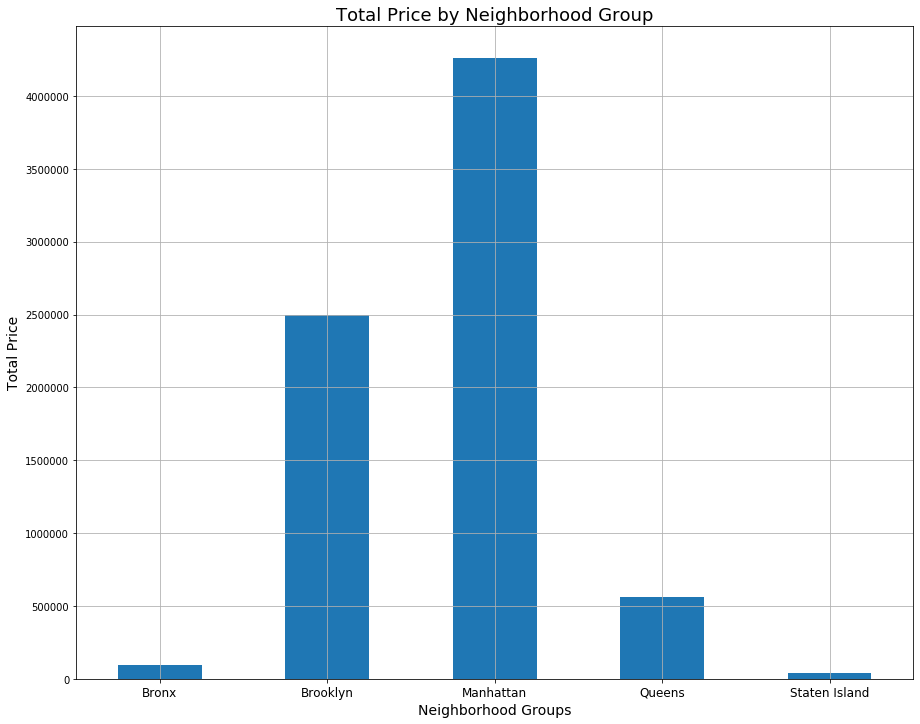

In [150]:
print(f"The neighborhood group with the highest total price was Manhattan at $4,264,527")
df_sump.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Total Price by Neighborhood Group", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Neighborhood Groups", fontsize=14)
plt.ylabel("Total Price", fontsize=14);





      

The following hosts had the top 5 highest total prices:


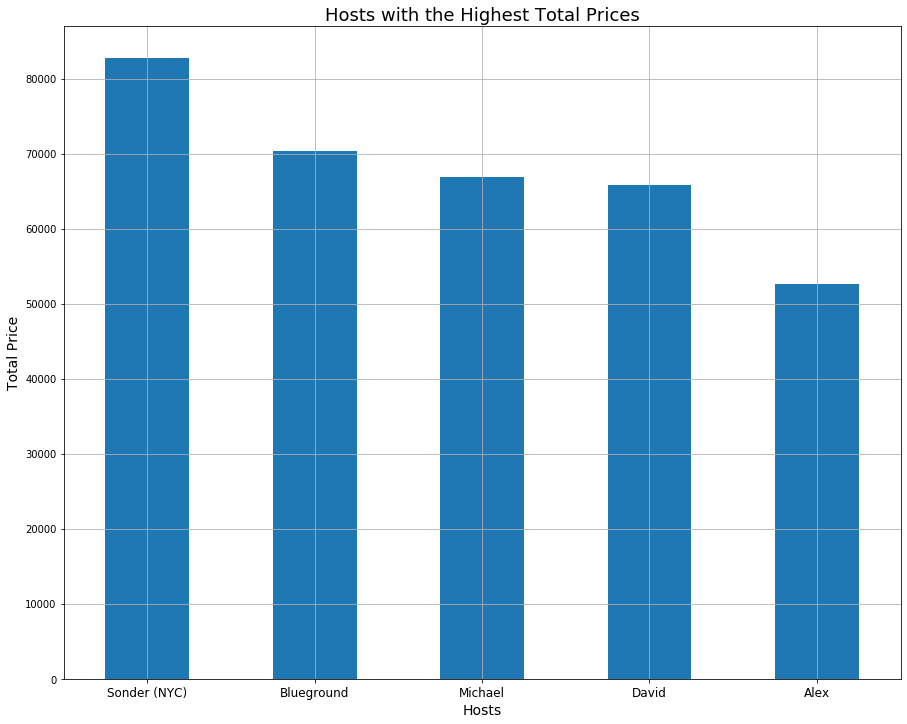

In [151]:

print(f"The following hosts had the top 5 highest total prices:")
df_hosttp.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Hosts with the Highest Total Prices", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Hosts", fontsize=14)
plt.ylabel("Total Price", fontsize=14);



These hosts have over 100 reviews and no zero availability: ['Blueground', 'Sonder (NYC)'].

The host with the highest total prices is Sonder (NYC) with a total of $82,795. Sonder (NYC) is located in ['Manhattan'] in the following neighborhoods: ['Financial District', 'Murray Hill', "Hell's Kitchen", 'Midtown', 'Theater District', 'Chelsea', 'Upper East Side'].

Danielle from Queens reviewed her last review on 2019-07-08 00:00:00.

Michael has 417 listings, the most of any host.

1295 listings are completely open (365 days per year).

Entire home/apt listings have the highest number of reviews (25409 reviews).


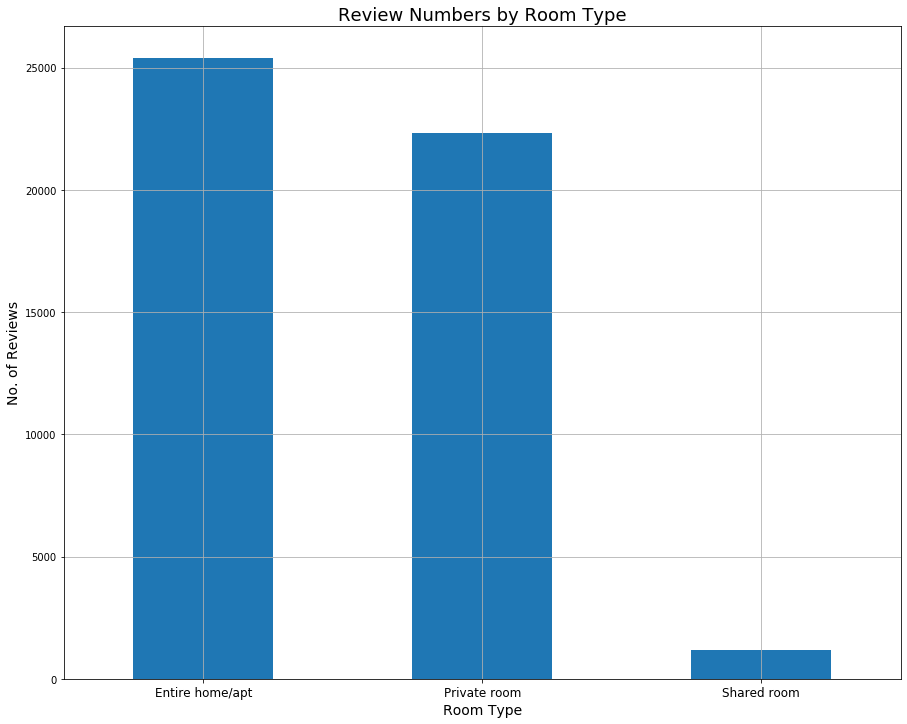

In [152]:
print(f"These hosts have over 100 reviews and no zero availability: {ylist}.\n")

print(f"The host with the highest total prices is Sonder (NYC) with a total of $82,795. Sonder (NYC) is located in {group} in the following neighborhoods: {neigh}.\n")

print(f"Danielle from Queens reviewed her last review on {lastr}.\n")

print(f"Michael has 417 listings, the most of any host.\n")

print(f"{availnum} listings are completely open (365 days per year).\n")

print(f"Entire home/apt listings have the highest number of reviews (25409 reviews).")
rtrev.plot(kind="bar", figsize=(15,12), grid=True)
plt.title("Review Numbers by Room Type", fontsize=18)
plt.xticks(rotation='horizontal', fontsize=12)
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("No. of Reviews", fontsize=14);